# Введение в искусственные нейронные сети
# Урок 2. Keras

# <font color='red'>Практическое задание</font>

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

Русскоязычная документация Keras - https://ru-keras.com/home/

 ### Набор данных Fashion MNIST
 
Набор состоит из изображений размером 28х28, каждый пиксель которого представляет собой оттенок серого.

![title](fashion_MNIST.jpeg)

Cписок того, что содержит в себе набор данных Fashion MNIST:

![title](classes.jpg)

Каждому входному изображению соответствует одна из перечисленных выше меток.
Набор данных Fashion MNIST содержит 70 000 изображений. Из этих 70 000 мы воспользуемся 60 000 для тренировки нейронной сети.
А оставшимися 10 000 элементами используем, для проверки нейронной сети.

Каждое изображение в наборе данных представляет собой изображение размером 28х28 в оттенках серого, т. е. каждое изображение размером 784 байта.

Задача заключается в том, чтобы создать нейронную сеть, которая на входе получает эти 784 байта, а на выходе возвращает к какой категории одежды из 10 имеющихся поданый на входе элемент относится.

![title](nnet.png)

# 

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Плащь',
               'Сандали', 'Рубашка', 'Кросовки', 'Сумки', 'Ботинки']

# Загрузка Fashion_MNIST

In [3]:
(train_imagesi,train_labels),(test_imagesi,testn_labels)=fashion_mnist.load_data()

# получили 2 кортежа:
# 1-й содержит тренировочный набор и его метки,
# 2-й тестовый набор и его метки
# размерность данных 28 x 28 и 256 оттенков серого
# каждому объекту приписан свой label

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten (cплющивать) the images.
# делаем reshape - картинку 28 x 28 переводим в вектор 1 x 784
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

# Размер набора входных данных для обучения
print(train_images.shape) # (60000, 784) - 60000 объектов, 60000 - labels
print(test_images.shape)  # (10000, 784) - 10000 объектов, 10000 - labels

(60000, 784)
(10000, 784)


In [4]:
n=1
train_imagesi[n,:,:].shape

(28, 28)

In [5]:
keras.backend.backend()

'tensorflow'

In [6]:
import matplotlib.pyplot as plt

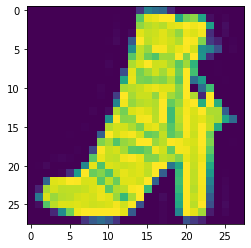

9


In [7]:
# цвет 0-255 оттенки серого
n = 11
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

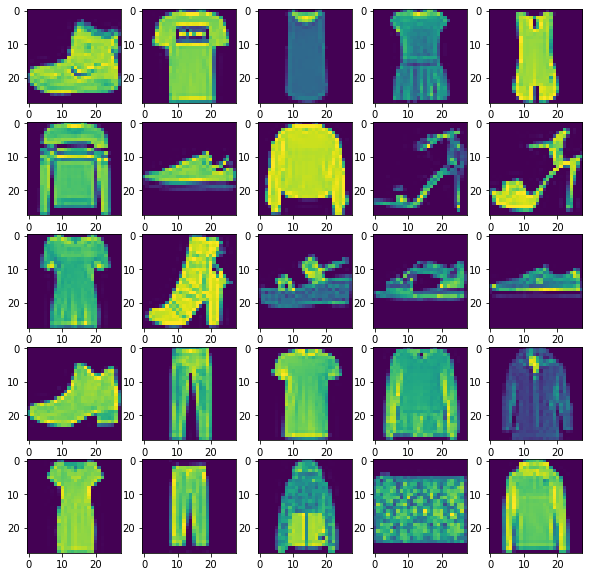

In [8]:
# First 25 images in the train dataset
plt.figure(figsize = (10, 10))
for i in range(25):
    image = train_imagesi[i,:,:]
    image = np.array(image)
    image = image.reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
plt.show()  

In [9]:
train_labels[:12]
# нужно сделать label_incoding в one_hot_incoding - 10 выходов (кодируются 0 и 1)

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [10]:
train_images[202,150:160]
# нейронки, в процессе обучения, не любят целые числа, они посторенны на вещественных числах (1:09:55)
# до момента пока их не начинают внедрять в прок

array([-0.5984252 , -0.62204724, -0.64566929, -0.56692913, -0.59055118,
       -0.62992126, -0.61417323, -0.61417323, -0.66929134, -0.58267717])

In [11]:
# количество элементов классов на test
unique, counts = np.unique(np.array(train_labels), return_counts=True)
# print(np.asarray((unique, counts)).T)
print(np.asarray((unique, counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]]


In [12]:
# количество элементов классов на train
unique, counts = np.unique(np.array(testn_labels), return_counts=True)
print(np.asarray((unique, counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]]


# Создание модели

После первичной подготовки данных посроим модель нейронной сети, которая будет учиться на этих данных.

In [13]:
# Собираем архитектуру
# Код нейронной сети в Keras
###############################
import numpy as np
from keras.models import Sequential
from keras.layers import Dense  # плотный полносвязный слой 
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical  # методы функционирования н/сети как таковой

In [14]:
# model1 = Sequential(name='my_model')

# # добавляем входящийслой
# model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# # units = 128 - гиперпараметр количество нейронов в следующем слое

# # добавляем внутренние слои
# # входной слой + полносвязный слой из 128 нейронов с активацией ReLU
# for k in range(2):
#     model1.add(Dense(  10+(10-k)*10, activation='tanh')) 
#     # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh (units=10+(10-k)*10 гиперпараметр)

# # выходной слой
# model1.add(Dense(10, activation='softmax')) 
# # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax (последний слойвзвешен по активации)

In [15]:
# Млдель 1
# Build the model.
model1 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

Компилируем сеть с оптимизатором , функцией потерь и метрикой:

In [16]:
#  собираем сеть - делаем компиляцию
model1.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    # у нас задача класификационного типа, классов больше 1, мы их строим как бинарные
    # поэтому используем ф-ю потерь CategoricalCrossentropy()
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    # у нас задача класификационного типа, метрики опираются на вычисление ошибок
    # так как выборка абсолютно сбалансированна - используем accuracy (1:33:11)
    metrics=['accuracy'], # метрика
) 

In [17]:
# model1.summary()

126 780 параметров в сети. Все будем обучать.

Total params: 126,780<br>
Trainable params: 126,780<br>
Non-trainable params: 0  - не настраиваемые параметры

Как считать параметры слоя: (число входов нейрона +1)*число нейронов


Например,
- для 5 входов и 10 нейронов в слое - число настраиваемых параметров = (5+1)*10 = 60<br>
- для 784 входов и 128 нейронов в слое - число настраиваемых параметров = 784 * (128 + 1) = 100480 

Посмотрим описание модели после ее создания (конфигурация сети)

In [18]:
# model1.get_config()

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [19]:
train_labels[:5]  # labels

array([9, 0, 0, 3, 0], dtype=uint8)

In [20]:
# labels превращаем в catigorical labels и применяем one_hot_incoding для lables
y_t = to_categorical( train_labels)
y_tt = to_categorical(testn_labels)

In [21]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [23]:
y_tt[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Посмотрим на реакции модели до обучения - уже можно:)

In [24]:
y_pred = model1.predict(train_images[:5,:])

In [25]:
# y_pred[0,:]  # предикт никуда не годится, так как мы не учили нашу сеть (1:39:46)

In [26]:
y_class = np.argmax(y_pred, axis=1)
print(y_class) # [9, 0, 0, 3, 0]

# должны были получить [9, 0, 0, 3, 0]
# получили [1, 2, 2, 2, 6]

[0 3 1 1 3]


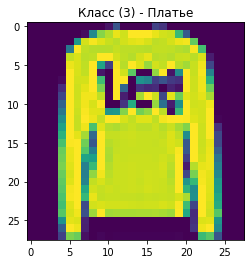

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Плащь',
               'Сандали', 'Рубашка', 'Кросовки', 'Сумки', 'Ботинки']

n = 1
plt.imshow(test_imagesi[n,:,:])
plt.title('Класс (' + str(y_class[n]) + ') - '+ class_names[y_class[n]])
plt.show()

Сделаем цикл тренировки модели

In [28]:
# Train the model.
model1.fit(  
  train_images[:,:],  # вход

  y_t[:,:],  # выход
  epochs=15,
  batch_size=1024, validation_split=0.2  # использовать 20 % данных для валидации
  , verbose = 0
)

# Evaluate the model.
# Проверка - валидационный ответ на отложенной выборке (оценка качества решённой задачи на отложенной выборке):
# loss: 0.4442 - accuracy: 0.8809 (для тестов). 
model1.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [7, 2, 1, 0, 4]


# тренировка loss: 0.0890 - accuracy: 0.9685
# валидация val_loss: 0.4195 - val_accuracy: 0.88

# Выключить верболизацию (показ процесса обучения сети) verbose = 0
# verbose = 0 - отключение верболизации (эхо вывода)

313/313 [==============================] - 1s 4ms/step - loss: 0.3576 - accuracy: 0.8746
[9 2 1 1 6]
[9 2 1 1 6]


In [29]:
print(test_images[:5]) # [7, 2, 1, 0, 4]

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


# Сохраним модель на диск

In [30]:
# сохранить всю модель целиком вместе с графом (это дорого).
# model.save('model.h5')

# сохранить только веса модели.
model1.save_weights('model_fashion_mnist.h5')

# загрузить веса модели:
# model.load_weights('model.h5')

In [31]:
# Train the model1. Вернем результаты по потерям и метрикам для всех эпох в hh1 
hh1 = model1.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=1024, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [7, 2, 1, 0, 4]

313/313 [==============================] - 1s 4ms/step - loss: 0.3773 - accuracy: 0.8796
[9 2 1 1 6]
[9 2 1 1 6]


Посмотрим на возвращаемый словарь hh.history (там результаты по эпохам для потерь и метрик по обучению и тестам)

In [32]:
# hh1.history

Покажем как выглядит кривая обучения

In [33]:
# plt.figure(figsize=(15,7))
# plt.plot(hh1.history['loss'], label = 'потери для тренировки')
# plt.plot(hh1.history['val_loss'], label = 'потери для валидации')
# plt.xlabel('эпох')
# plt.ylabel('loss')
# plt.legend()
# plt.grid('On')
# plt.title('Потери от эпох: model1')
# plt.show()

In [34]:
# hh1

Создадим ещё две содержащих два слоя модели

In [35]:
# Модель 2
# Build the model.
model2 = Sequential([
  Dense(256, activation='tanh', input_shape=(784,)),
  Dense(220, activation='tanh'), # Скрытый слой из 220 нейронов с активацией tanh
  Dense(200, activation='tanh'), # Скрытый слой k из 200 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

#  собираем сеть - делаем компиляцию
model2.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
) 

In [36]:
# Train the model2. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh2 = model2.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model2.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model2.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 1s 4ms/step - loss: 0.3429 - accuracy: 0.8759
[9 2 1 1 6]
[9 2 1 1 6]


In [37]:
# Модель 3
# Build the model.
model3 = Sequential([
  Dense(512, activation='tanh', input_shape=(784,)),
  Dense(440, activation='tanh'), # Скрытый слой из 220 нейронов с активацией tanh
  Dense(400, activation='tanh'), # Скрытый слой k из 200 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

#  собираем сеть - делаем компиляцию
model3.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
) 

In [38]:
# Train the model3. Вернем результаты по потерям и метрикам для всех эпох в hh3 
hh3 = model3.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model3.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model3.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 3s 8ms/step - loss: 0.3628 - accuracy: 0.8685
[9 2 1 1 6]
[9 2 1 1 6]


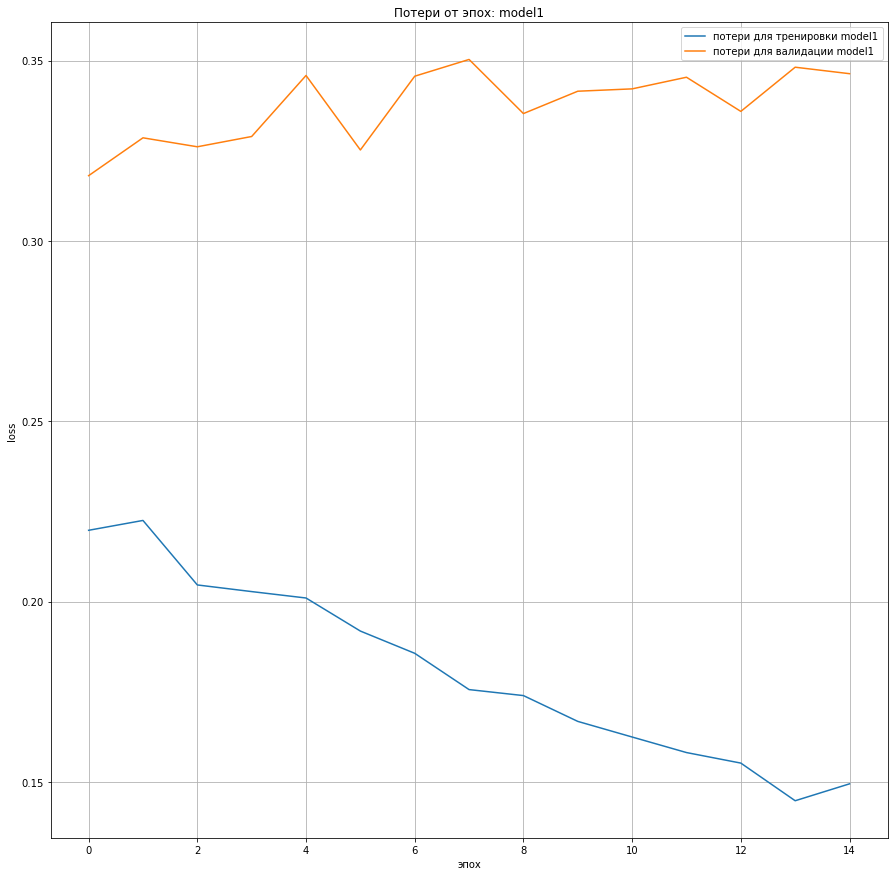

In [39]:
plt.figure(figsize=(15,15))
plt.plot(hh1.history['loss'], label = 'потери для тренировки model1')
plt.plot(hh1.history['val_loss'], label = 'потери для валидации model1')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

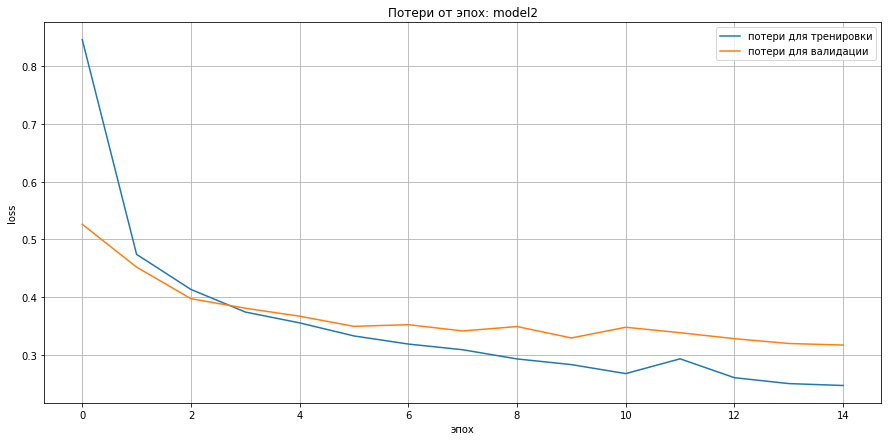

In [40]:
plt.figure(figsize=(15,7))
plt.plot(hh2.history['loss'], label = 'потери для тренировки')
plt.plot(hh2.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model2')
plt.show()

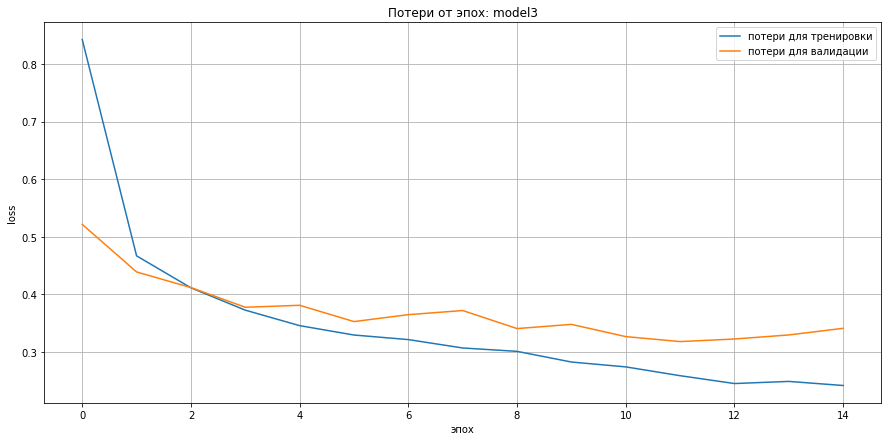

In [41]:
plt.figure(figsize=(15,7))
plt.plot(hh3.history['loss'], label = 'потери для тренировки')
plt.plot(hh3.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model3')
plt.show()

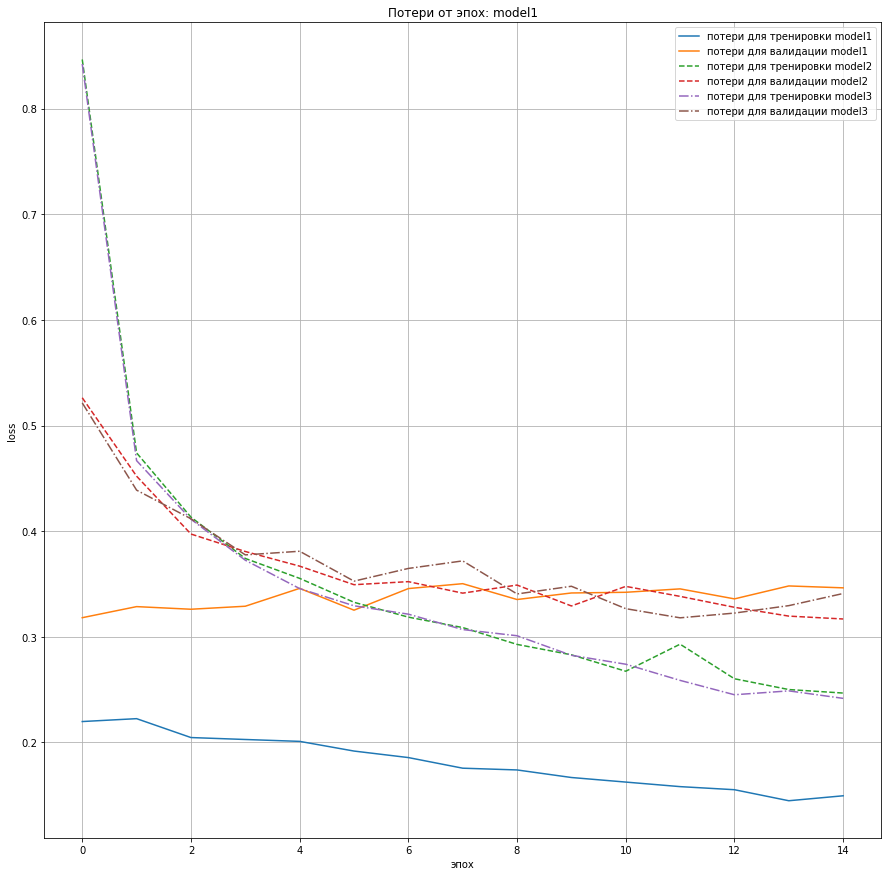

In [42]:
plt.figure(figsize=(15,15))
plt.plot(hh1.history['loss'], label = 'потери для тренировки model1')
plt.plot(hh1.history['val_loss'], label = 'потери для валидации model1')
plt.plot(hh2.history['loss'], label = 'потери для тренировки model2', linestyle = '--')
plt.plot(hh2.history['val_loss'], label = 'потери для валидации model2', linestyle = '--')
plt.plot(hh3.history['loss'], label = 'потери для тренировки model3', linestyle = '-.')
plt.plot(hh3.history['val_loss'], label = 'потери для валидации model3', linestyle = '-.')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

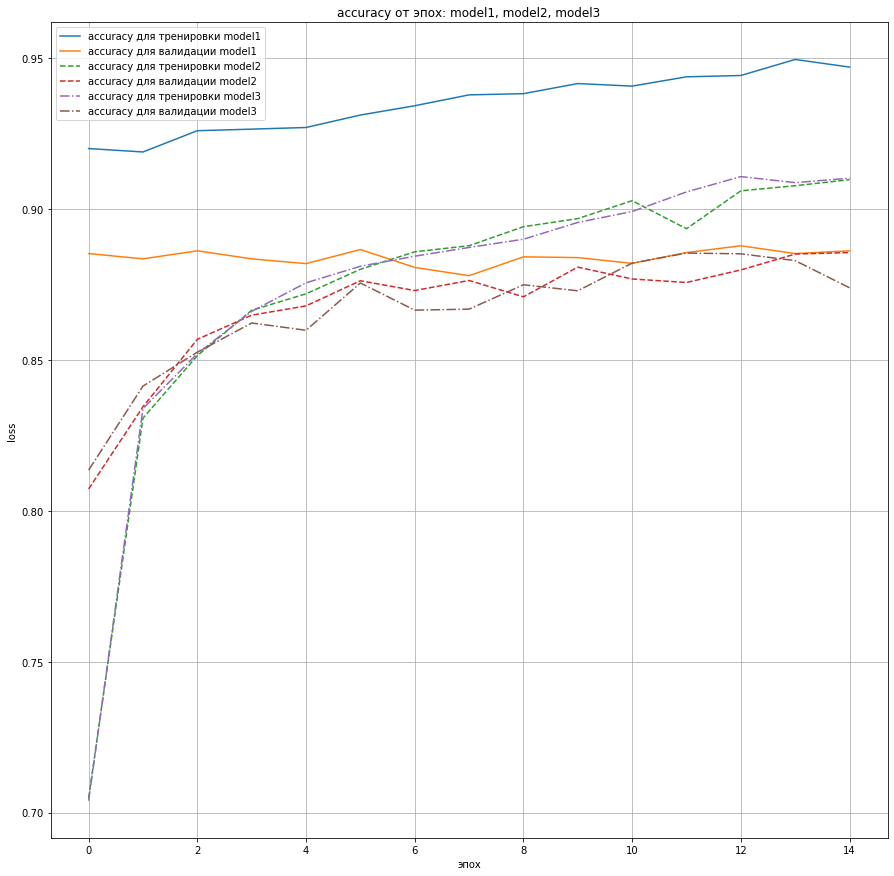

In [43]:
plt.figure(figsize=(15,15))
plt.plot(hh1.history['accuracy'], label = 'accuracy для тренировки model1')
plt.plot(hh1.history['val_accuracy'], label = 'accuracy для валидации model1')
plt.plot(hh2.history['accuracy'], label = 'accuracy для тренировки model2', linestyle = '--')
plt.plot(hh2.history['val_accuracy'], label = 'accuracy для валидации model2', linestyle = '--')
plt.plot(hh3.history['accuracy'], label = 'accuracy для тренировки model3', linestyle = '-.')
plt.plot(hh3.history['val_accuracy'], label = 'accuracy для валидации model3', linestyle = '-.')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('accuracy от эпох: model1, model2, model3')
plt.show()

In [44]:
print('model1:',
'\nloss: ', hh1.history['loss'][14],
'\naccuracy: ', hh1.history['accuracy'][14],
'\nval_loss: ', hh1.history['val_loss'][14],
'\nval_accuracy: ', hh1.history['val_accuracy'][14])

print('\n\nmodel2:',
'\nloss: ', hh2.history['loss'][14],
'\naccuracy: ', hh2.history['accuracy'][14],
'\nval_loss: ', hh2.history['val_loss'][14],
'\nval_accuracy: ', hh2.history['val_accuracy'][14])

print('\n\nmodel3:',
'\nloss: ', hh3.history['loss'][14],
'\naccuracy: ', hh3.history['accuracy'][14],
'\nval_loss: ', hh3.history['val_loss'][14],
'\nval_accuracy: ', hh3.history['val_accuracy'][14])

model1: 
loss:  0.14947684109210968 
accuracy:  0.9470416903495789 
val_loss:  0.346354216337204 
val_accuracy:  0.8861666917800903


model2: 
loss:  0.246734619140625 
accuracy:  0.9097291827201843 
val_loss:  0.31686195731163025 
val_accuracy:  0.8855833411216736


model3: 
loss:  0.24171440303325653 
accuracy:  0.9102291464805603 
val_loss:  0.3409962058067322 
val_accuracy:  0.8739166855812073


# 
# <font color='red'>Практическое задание</font>

Используем набор примеров fashion-MNIST
1. Опишите - какой результата получен в нейросети в зависимости от:
 - числа нейронов в слое(для 2-хслойной сети),
 - фиксируйте для тренировочного и тестового набора метрики accuracy.

## Вывод:

- __model1__: loss: 0.3789 - accuracy: 0.8808
- __model2__: loss: 0.3664 - accuracy: 0.8720
- __model3__: loss: 0.3417 - accuracy: 0.8788

__Увеличение ширины слоёв уменьшает loss (ошибку) на тесте (для 2-х слойной сети), accuracy на тесте изменяеся незначиельно__.

In [45]:
# hh3.history

# 
# <font color='red'>Практическое задание</font>

Используем набор примеров fashion-MNIST
1. Опишите - какой результата получен в нейросети в зависимости от:
 - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

In [46]:
model_2 = Sequential(name='model_2')

# добавляем входящий слой
model_2.add(Dense( 128, activation='relu', input_shape=(784,)))  

# добавляем внутренние слои
for k in range(2):
    model_2.add(Dense(  17+(17-k)*10, activation='tanh')) 

# выходной слой
model_2.add(Dense(10, activation='softmax')) 

In [47]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 187)               24123     
                                                                 
 dense_14 (Dense)            (None, 177)               33276     
                                                                 
 dense_15 (Dense)            (None, 10)                1780      
                                                                 
Total params: 159,659
Trainable params: 159,659
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_3 = Sequential(name='model_3')

# добавляем входящий слой
model_3.add(Dense( 128, activation='relu', input_shape=(784,)))  

# добавляем внутренние слои
for k in range(3):
    model_3.add(Dense(  14+(13-k)*10, activation='tanh')) 

# выходной слой
model_3.add(Dense(10, activation='softmax')) 

In [49]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 144)               18576     
                                                                 
 dense_18 (Dense)            (None, 134)               19430     
                                                                 
 dense_19 (Dense)            (None, 124)               16740     
                                                                 
 dense_20 (Dense)            (None, 10)                1250      
                                                                 
Total params: 156,476
Trainable params: 156,476
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_5 = Sequential(name='model_5')

# добавляем входящий слой
model_5.add(Dense( 128, activation='relu', input_shape=(784,)))  

# добавляем внутренние слои
for k in range(5):
    model_5.add(Dense(  11+(11-k)*10, activation='tanh')) 

# выходной слой
model_5.add(Dense(10, activation='softmax')) 

In [51]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 121)               15609     
                                                                 
 dense_23 (Dense)            (None, 111)               13542     
                                                                 
 dense_24 (Dense)            (None, 101)               11312     
                                                                 
 dense_25 (Dense)            (None, 91)                9282      
                                                                 
 dense_26 (Dense)            (None, 81)                7452      
                                                                 
 dense_27 (Dense)            (None, 10)                820 

In [52]:
model_10 = Sequential(name='model_10')

# добавляем входящий слой
model_10.add(Dense( 128, activation='relu', input_shape=(784,)))  

# добавляем внутренние слои
for k in range(10):
    model_10.add(Dense(  10+(10-k)*10, activation='tanh')) 

# выходной слой
model_10.add(Dense(10, activation='softmax')) 

In [53]:
model_10.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 110)               14190     
                                                                 
 dense_30 (Dense)            (None, 100)               11100     
                                                                 
 dense_31 (Dense)            (None, 90)                9090      
                                                                 
 dense_32 (Dense)            (None, 80)                7280      
                                                                 
 dense_33 (Dense)            (None, 70)                5670      
                                                                 
 dense_34 (Dense)            (None, 60)                426

In [54]:
#  model_2 собираем сеть - делаем компиляцию
model_2.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
)

In [55]:
# Train the model2. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh2 = model_2.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model_2.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model_2.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8695
[9 2 1 1 6]
[9 2 1 1 6]


In [56]:
#  model_3 собираем сеть - делаем компиляцию
model_3.compile(
#     optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    optimizer='NAdam',
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
)

In [57]:
# Train the model_3. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh3 = model_3.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model_3.evaluate(
  test_images,
  to_categorical(testn_labels)
)


# Predict on the first 5 test images.
predictions = model_3.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# сохранить только веса модели.
model_3.save_weights('model_3_fashion_mnist.h5')

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 2s 5ms/step - loss: 0.3833 - accuracy: 0.8596
[9 2 1 1 6]
[9 2 1 1 6]


In [58]:
#  model_5 собираем сеть - делаем компиляцию
model_5.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
)

In [59]:
# Train the model2. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh5 = model_5.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model_5.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model_5.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 1s 4ms/step - loss: 0.3566 - accuracy: 0.8720
[9 2 1 1 6]
[9 2 1 1 6]


In [60]:
#  model_10 собираем сеть - делаем компиляцию
model_10.compile(
    optimizer='adam', # оптимизатор (лежат в библиотеке keras.optimiser)
    loss=keras.losses.CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
)

In [61]:
# Train the model2. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh10 = model_10.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=2048, validation_split=0.2, verbose = 0
)  
# объект hh - стандартны callback (обратный вызов) - содержит историю, которую затем можно отобразить (см. ниже)

# Evaluate the model.
model_10.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model_10.predict(test_images[:5])  # решение векторное (one_hot_incoding), вектор вероятностей

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [9 2 1 1 6]

313/313 [==============================] - 1s 5ms/step - loss: 0.3867 - accuracy: 0.8738
[9 2 1 1 6]
[9 2 1 1 6]


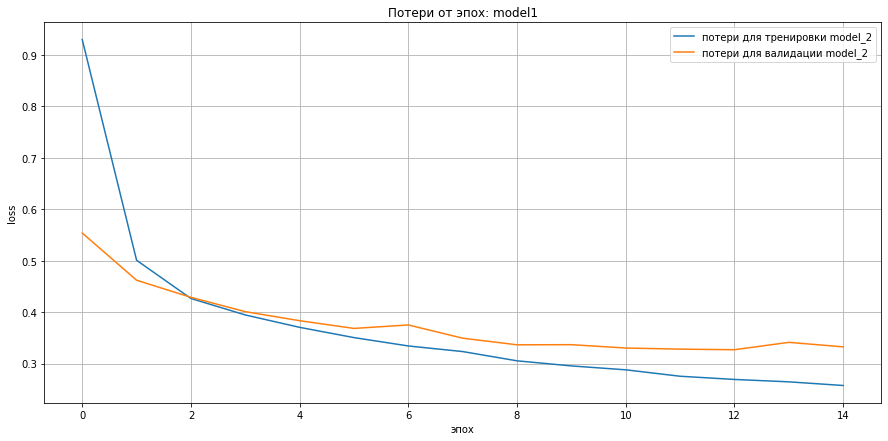

In [62]:
plt.figure(figsize=(15,7))
plt.plot(hh2.history['loss'], label = 'потери для тренировки model_2')
plt.plot(hh2.history['val_loss'], label = 'потери для валидации model_2')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

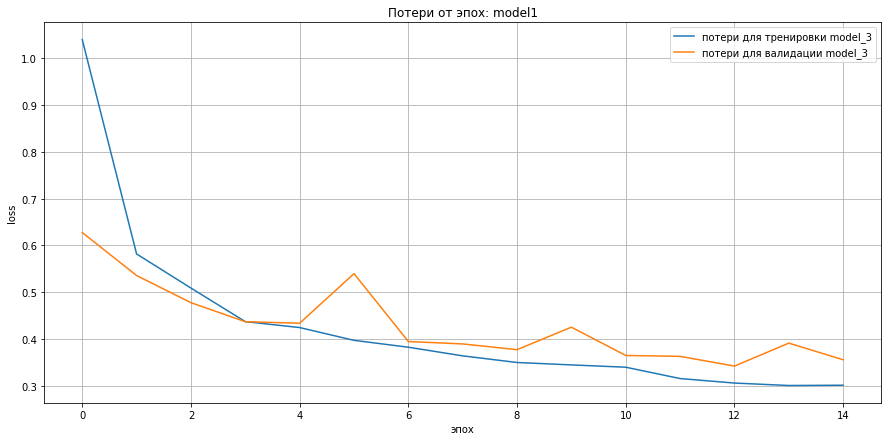

In [63]:
plt.figure(figsize=(15,7))
plt.plot(hh3.history['loss'], label = 'потери для тренировки model_3')
plt.plot(hh3.history['val_loss'], label = 'потери для валидации model_3')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

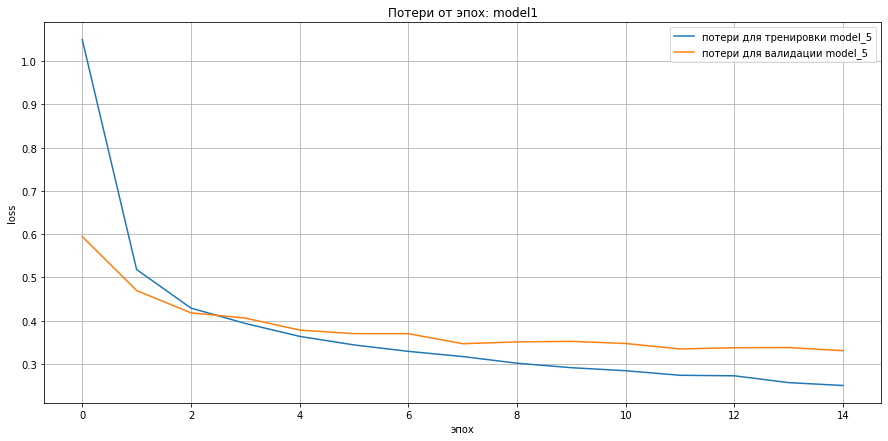

In [64]:
plt.figure(figsize=(15,7))
plt.plot(hh5.history['loss'], label = 'потери для тренировки model_5')
plt.plot(hh5.history['val_loss'], label = 'потери для валидации model_5')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

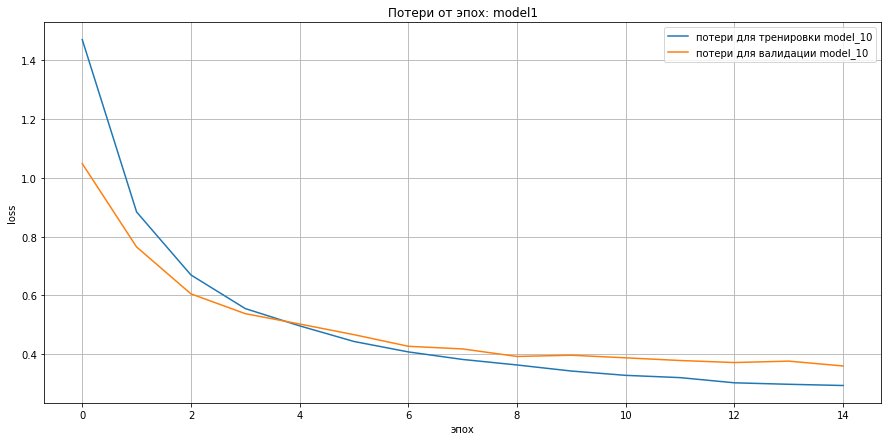

In [65]:
plt.figure(figsize=(15,7))
plt.plot(hh10.history['loss'], label = 'потери для тренировки model_10')
plt.plot(hh10.history['val_loss'], label = 'потери для валидации model_10')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох: model1')
plt.show()

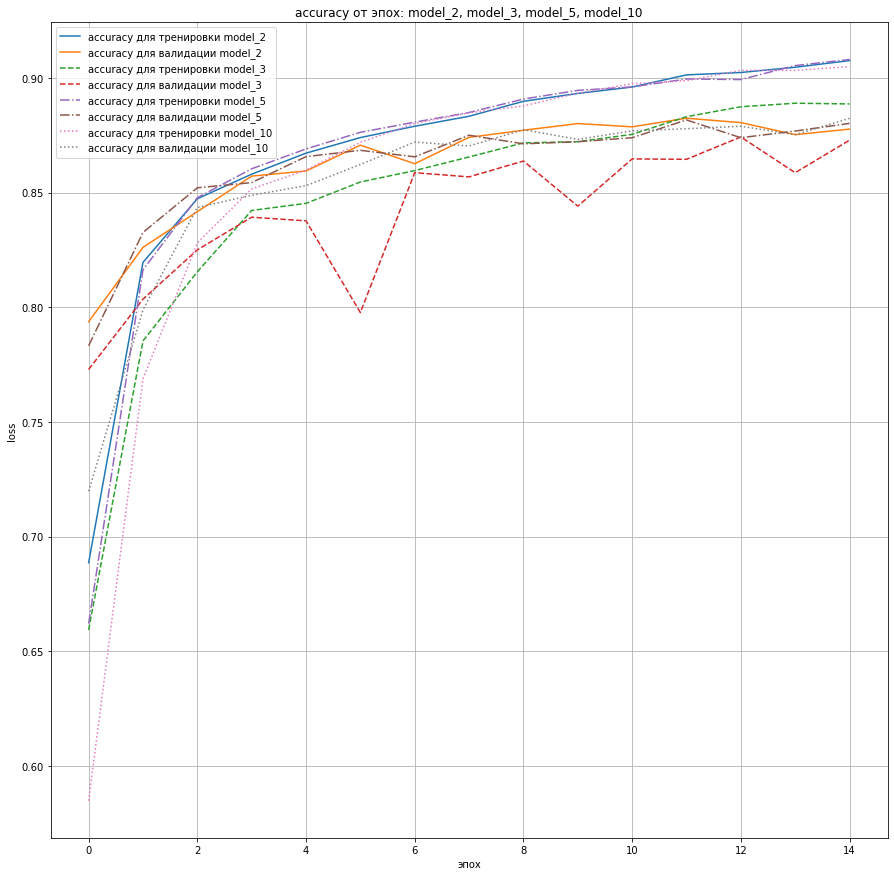

In [66]:
plt.figure(figsize=(15,15))
plt.plot(hh2.history['accuracy'], label = 'accuracy для тренировки model_2')
plt.plot(hh2.history['val_accuracy'], label = 'accuracy для валидации model_2')
plt.plot(hh3.history['accuracy'], label = 'accuracy для тренировки model_3', linestyle = '--')
plt.plot(hh3.history['val_accuracy'], label = 'accuracy для валидации model_3', linestyle = '--')
plt.plot(hh5.history['accuracy'], label = 'accuracy для тренировки model_5', linestyle = '-.')
plt.plot(hh5.history['val_accuracy'], label = 'accuracy для валидации model_5', linestyle = '-.')
plt.plot(hh10.history['accuracy'], label = 'accuracy для тренировки model_10', linestyle = ':')
plt.plot(hh10.history['val_accuracy'], label = 'accuracy для валидации model_10', linestyle = ':')

plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('accuracy от эпох: model_2, model_3, model_5, model_10')
plt.show()

In [67]:
print('model_2:',
'\nloss: ', hh2.history['loss'][14],
'\naccuracy: ', hh2.history['accuracy'][14],
'\nval_loss: ', hh2.history['val_loss'][14],
'\nval_accuracy: ', hh2.history['val_accuracy'][14])

print('\n\nmodel_3:',
'\nloss: ', hh3.history['loss'][14],
'\naccuracy: ', hh3.history['accuracy'][14],
'\nval_loss: ', hh3.history['val_loss'][14],
'\nval_accuracy: ', hh3.history['val_accuracy'][14])

print('\n\nmodel_5:',
'\nloss: ', hh5.history['loss'][14],
'\naccuracy: ', hh5.history['accuracy'][14],
'\nval_loss: ', hh5.history['val_loss'][14],
'\nval_accuracy: ', hh5.history['val_accuracy'][14])

print('\n\nmodel_10:',
'\nloss: ', hh10.history['loss'][14],
'\naccuracy: ', hh10.history['accuracy'][14],
'\nval_loss: ', hh10.history['val_loss'][14],
'\nval_accuracy: ', hh10.history['val_accuracy'][14])

model_2: 
loss:  0.2572919428348541 
accuracy:  0.9075416922569275 
val_loss:  0.33240175247192383 
val_accuracy:  0.8776666522026062


model_3: 
loss:  0.3012271821498871 
accuracy:  0.8886458277702332 
val_loss:  0.35564854741096497 
val_accuracy:  0.8728333115577698


model_5: 
loss:  0.2504550516605377 
accuracy:  0.9080416560173035 
val_loss:  0.3308534026145935 
val_accuracy:  0.8801666498184204


model_10: 
loss:  0.2927842438220978 
accuracy:  0.9049166440963745 
val_loss:  0.3592042624950409 
val_accuracy:  0.8823333382606506


# 
# <font color='red'>Практическое задание</font>

Используем набор примеров fashion-MNIST
1. Опишите - какой результата получен в нейросети в зависимости от:
 - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
 - фиксируйте для тренировочного и тестового набора метрики accuracy.

## Вывод:

- __model_2__ (2 слоя, Total params: 159,659): 
    - loss: 0.3584
    - accuracy: 0.8730
- __model_3__ (3 слоя, Total params: 156,476): 
    - loss: 0.3525
    - accuracy: 0.8753
- __model_5__ (5 слоёв, Total params: 158,497):
    - loss: 0.3599
    - accuracy: 0.8753
- __model_10__ (10 слоёв, Total params: 159,220):
    - loss: loss: 0.3702
    - accuracy: 0.8772

__Увеличение числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров) привело к следующему результату__:
- Увеличение числа слоёв ведёт к увеличению accuracy: с $accuracy=0.8730$ для 2-х слоёв, до $accuracy=0.8772$ для 10-ти слоёв.
- Минимальное значение $loss=0.3525$ достигнуто при количестве слоёв равном 3.
- При дальнейшем увеличении количесва слоёв ошибка увеличиваеся,досигнув значения $loss=0.3702$ для 10-ти слоёв

Увеличение ширины слоёв уменьшает loss (ошибку) на тесте (для 2-х слойной сети).


<br>Данный результат получен для случая близких размеров сети (близкое число тренируемых парметров): $Total\ params \approx 159\  000$

# 
# <font color='red'>Практическое задание</font>

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

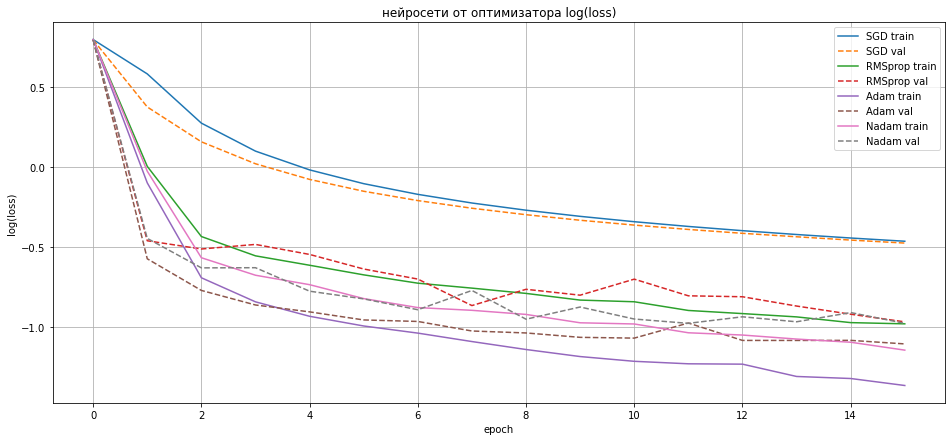

In [68]:
# 
# Покажем как работают оптимайзеры с одной начальной точки
#
# создаем модель model
model_3 = Sequential([
                  Dense(128, activation='tanh', input_shape=(784,)),
                  Dense(144, activation='tanh'),
                  Dense(134, activation='tanh'),
                  Dense(124, activation='tanh'),
                  Dense(10, activation='softmax')
])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model_3.save_weights('model_all_fashion_mnist.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

# Запускаем оптимизаторы с одного значения
#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:  # NAdam - Нестеров Adam
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(128, activation='tanh', input_shape=(784,)),
                      Dense(144, activation='tanh'),
                      Dense(134, activation='tanh'),
                      Dense(124, activation='tanh'),
                      Dense(10, activation='softmax')
    ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model_all_fashion_mnist.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=2048, validation_split=0.2, verbose = 0
                  )
    # картинки
    # используем логарифмическую форму представления потерь np.log()
    # так как сначала они очень большие,
    # modeli.optimizer.get_config() - возможность добраться до исмпользуемого оптимизатора
    # (смотрим параметры нашей сети)
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

# Оптимизаторы приводят к разным сетям
# Разные начальные точки приводят к разным результатам

# verbose = 0 - отключение верболизации (эховывода)

# точто мы делаем,это минипакетная обработка 

In [69]:
 modeli.optimizer.get_config()  # последний оптимизатор. Появилось 5 новых гиперпараметра

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [70]:
# Минимальная ошибка (loss) на test-е у оптимизатора Adam

i_optim = 'NAdam'
# создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
model = Sequential([
                  Dense(128, activation='tanh', input_shape=(784,)),
                  Dense(144, activation='tanh'),
                  Dense(134, activation='tanh'),
                  Dense(124, activation='tanh'),
                  Dense(10, activation='softmax')
])

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 128)               100480    
                                                                 
 dense_66 (Dense)            (None, 144)               18576     
                                                                 
 dense_67 (Dense)            (None, 134)               19430     
                                                                 
 dense_68 (Dense)            (None, 124)               16740     
                                                                 
 dense_69 (Dense)            (None, 10)                1250      
                                                                 
Total params: 156,476
Trainable params: 156,476
Non-trainable params: 0
_________________________________________________________________


In [72]:
# загружаем веса modeli.load_weights('model.h5')
model.load_weights('model_3_fashion_mnist.h5')
# компилируем modeli с одним из оптимизаторов
model.compile(
  optimizer=i_optim,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

hh = model.fit(
              train_images,
              to_categorical(train_labels),
              epochs=epochs,
              batch_size=2048, validation_split=0.2, verbose = 0
              )

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

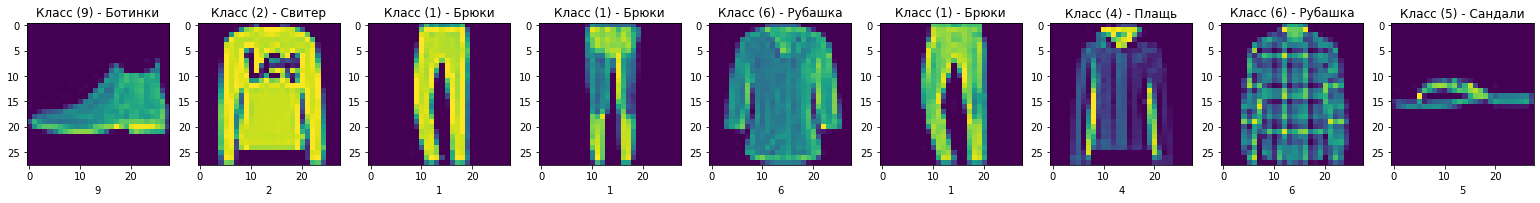

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Плащь',
               'Сандали', 'Рубашка', 'Кросовки', 'Сумки', 'Ботинки']


N = 9
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
# y_class = np.argmax(y_pred, axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
    plt.subplot(1,N,i+1)
#     plt.title('Класс (' + str(y_class[n]) + ') - '+ class_names[y_class[n]])
    plt.title('Класс (' + str(y_pred_class[i]) + ') - '+ class_names[y_pred_class[i]])
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()  

# Очень хороший результат.

In [74]:
y_pred_class  # ответ

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=int64)

In [75]:
# Обращение к сети без слова predict
y_predi = model(test_images[:,:])
np.argmax(y_predi,axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [76]:
yy = np.argmax(y_predi,axis=1)
not_yy = np.where(testn_labels != yy)[0]
# вывод точек (индексы) где из 10000 примеров модель ошиблась
# for i in not_yy:
#     print(i)

print(not_yy.shape)

(1297,)


In [77]:
y_pred_class[0]

9

In [78]:
y_pred_class.shape

(9,)

# 
# <font color='red'>Практическое задание</font>

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)<br>

# Теория

Матрица ошибок (confusion matrix) 
![title](cm1.png)

#### TP — истино-положительное решение:
Интерпретация: Вы предсказали положительное, и это правда. <br> 
Вы предсказали, что женщина беременна, и она на самом деле беременна.

#### TN — истино-отрицательное решение:<br> 
Интерпретация: Вы прогнозировали отрицательное значения, и это правда.<br> 
Вы предсказали, что мужчина не беременен, а он на самом деле не беременен.

#### FP — ложно-положительное решение (ошибка 1-го рода, α-ошибка:
Интерпретация: Вы предсказали положительное значение, и это неверно.<br> 
Вы предсказали, что мужчина беременен, но на самом деле это не так.

#### FN — ложно-отрицательное решение (ошибка 2-го рода, β-ошибка): 
Интерпретация: Вы предсказали отрицательное значение, и это неверно.<br> 
Вы предсказали, что женщина не беременна, но она на самом деле беременная.

При этом, мы описываем прогнозируемые значения как положительные и отрицательные, а фактические значения как истинные и ложные.
![title](av_pv.png)

Оценить точность ML-модели можно с помощью следующих метрик качества

- __P__ – число истинных результатов, __P = TP + FN__;
- __N__ – число ложных результатов, __N = TN + FP__;
- __Precision (точность)__ – сколько всего результатов было предсказано верно;
- __Доля ошибок__;
- __Recall (полнота)__ – сколько истинных результатов было предсказано верно;
- __F-мера__, которая позволяет сравнить 2 модели, одновременно оценив полноту и точность. Здесь используется среднее гармоническое вместо среднего арифметического, сглаживая расчеты за счет исключения экстремальных значений.

![title](metriks.png)

Источник: https://hranalytic.ru/kak-ponyat-matrica-nesootvetstvij-confusion-matrix/

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
# y_pred_3 = np.argmax(model_3.predict([test_images,test_images]),axis=1)
y_pred = model.predict(test_images)
print(y_pred.shape)
print(testn_labels.shape)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

(10000, 10)
(10000,)
[3.59567821e-05 6.77515491e-05 1.68493338e-04 1.22746802e-04
 5.73413796e-04 2.17629746e-02 4.68114071e-04 1.10521294e-01
 1.05459643e-04 8.66173863e-01]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [81]:
yy = y_pred
np.where(testn_labels != yy)[0].shape
# вывод точек (индексы) где из 10000 примеров модель ошиблась
# не угаданно около 10%

(1297,)

In [82]:
CM = confusion_matrix(testn_labels, y_pred)
print('Confusion matrix:\n\n', CM)

Confusion matrix:

 [[881   0  27  25   4   1  54   0   8   0]
 [  3 965   2  24   3   0   1   0   2   0]
 [ 15   0 838  13 101   0  31   0   2   0]
 [ 29   9  20 889  35   0  12   0   6   0]
 [  0   1 108  27 848   0  12   0   4   0]
 [  1   0   0   2   0 924   0  56   3  14]
 [180   0 148  29 123   0 503   0  17   0]
 [  0   0   0   0   0  22   0 966   0  12]
 [  6   0   4   7   3   4   3   5 968   0]
 [  0   0   0   0   0  17   1  61   0 921]]


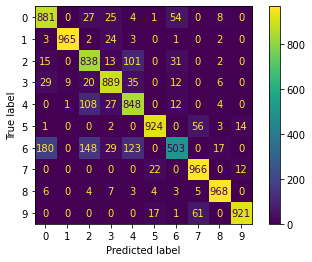

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

__Неплохой результат. Практически всё правильно. Небольшая проблема с 6-м классом.__

### Классы набора fashion-MNIST:
- класс 0: "Футболка/топ (T-shirt/top)":
- класс 1: "Шорты (Trouser)":
- класс 2: "Свитер (Pullover)":
- класс 3: "Платье (Dress)":
- класс 4: "Плащь (Coat)":
- класс 5: "Сандали (Sandal)":
- класс 6: "Рубашка (Shirt)":
- класс 7: "Кросовки (Sneaker)":
- класс 8: "Сумки (Bag)":
- класс 9: "Ботинки (Ankle boot)":

Полнота __Recall__
$$Recall=\frac{TP}{TP+FN}$$

Точность __Precision__
$$Precision=\frac{TP}{TP+FP}$$

In [84]:

def recall(tp, fn):
    return tp/(tp + fn)

def precision(tp, fn):
    return tp/(tp + fp)

In [85]:

# Оценим качество модели по каждому классу отдельно (полнота , точность)

class_recall = []
class_precision = []

for i in range(10):
    cm = 0
    for j in range(10):
        cm += CM[i][j]
    class_recall.append(CM[i][i]/cm)
    # print(f'Class {i}: Recall= {class_recall[i]},  CM[i][i]= {CM[i][i]}, TP+FN={cm}')
    
for j in range(10):
    cm = 0
    for i in range(10):
        cm += CM[i][j]
        
    class_precision.append(CM[j][j]/cm)
    # print(f'Class {j}: Precision= {class_precision[j]}, CM[j][j]= {CM[j][j]}, TP+FP={cm}')

# 
# <font color='red'>Практическое задание</font>

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)<br>

In [86]:
CM = confusion_matrix(testn_labels, y_pred)
print('Confusion matrix:\n\n', CM)

Confusion matrix:

 [[881   0  27  25   4   1  54   0   8   0]
 [  3 965   2  24   3   0   1   0   2   0]
 [ 15   0 838  13 101   0  31   0   2   0]
 [ 29   9  20 889  35   0  12   0   6   0]
 [  0   1 108  27 848   0  12   0   4   0]
 [  1   0   0   2   0 924   0  56   3  14]
 [180   0 148  29 123   0 503   0  17   0]
 [  0   0   0   0   0  22   0 966   0  12]
 [  6   0   4   7   3   4   3   5 968   0]
 [  0   0   0   0   0  17   1  61   0 921]]


In [87]:
for i in range(10):
    print(f'Класс {i} ({class_names[i]}): Recall={class_recall[i]}, Precision={class_precision[i]:.4f}')

Класс 0 (Футболка/топ): Recall=0.881, Precision=0.7901
Класс 1 (Брюки): Recall=0.965, Precision=0.9897
Класс 2 (Свитер): Recall=0.838, Precision=0.7306
Класс 3 (Платье): Recall=0.889, Precision=0.8750
Класс 4 (Плащь): Recall=0.848, Precision=0.7592
Класс 5 (Сандали): Recall=0.924, Precision=0.9545
Класс 6 (Рубашка): Recall=0.503, Precision=0.8152
Класс 7 (Кросовки): Recall=0.966, Precision=0.8879
Класс 8 (Сумки): Recall=0.968, Precision=0.9584
Класс 9 (Ботинки): Recall=0.921, Precision=0.9725


# $\color{green}{\text{Практическое задание}}$
# <font color='red'>Практическое задание</font>